# Figures for experimental evolution paper

Links to figures:
<a id="top"></a><br>
### <a href="#veg6_main"><bold>Veg6 figures:</bold></a><br>
<a href="#veg6_acmv">ACMV</a><br>
<a href="#veg6_eacmcv">EACMCV</a><br>
### <a href="#veg2_main"><bold>Veg2 figures:</bold></a><br>
<a href="#veg2_acmv">ACMV</a><br>
<a href="#veg2_eacmcv">EACMCV</a><br>
### <a href="#TajimaD">Tajima's D:</a><br>
<a href="#td_acmv">Veg6</a><br>
<a href="#td_eacmcv">Veg2</a><br>
### <a href="#anovas_main">ANOVA results:</a><br>
<a href="#anova_veg6">Veg6</a><br>
<a href="#anova_veg2">Veg2</a><br>

#### *Making tables with Plotly was not a great idea, but quite possible.We are working in Microsoft Word, so export ANOVA tables to csv, then generate tables either in Word or Excel then transfer to Word.*

### Common Plotting functions:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from tajimasD import tajimaD_W,waterson_theta
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FormatStrFormatter

from pi_for_temperature_notebook import *

veg_windows = pd.read_csv("veg6_windows.csv",header=0,index_col=0)

In [2]:
fig_format='png'

In [3]:
lengths = {'ACMV DNA-A':2781,
          'ACMV DNA-B':2725,
          'EACMCV DNA-A':2800,
          'EACMCV DNA-B':2732}

veg_windows = pd.read_csv("veg6_windows.csv",header=0,index_col=0)

regions = pd.read_csv("ACMV_EACMCV_regions.csv",header=0)
regions['length'] = regions[['start','stop']].max(axis=1)-regions[['start','stop']].min(axis=1)
regions.sort_values(by=['chrom','length'],ascending=False,inplace=True)

In [4]:
#colors = ['violet','indigo','b','g','yellow','orange','r'] # cm.get_cmap('hsv',7) #
#colors = ['b','r','y','k','g','grey','orange']
#colors=['b','r','k']
#colors = cm.get_cmap('binary', 10)
#colors = cm.get_cmap('coolwarm', 14)
colors = cm.get_cmap('PiYG',14)


In [5]:
def annot_acmv_ac1(ax,motif_y=0.03,fs=9):    
    #ACMV------------------------------------
    #RepB
    ax.add_patch(
            patch.Rectangle(
            (1752,0),
            width=53,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1735,motif_y,"REP B",rotation=30,horizontalalignment='left',fontsize=fs)

    #RepC
    ax.add_patch(
            patch.Rectangle(
            (1696,0),
            width=16,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1696,motif_y,"REP C",rotation=30,horizontalalignment='center',fontsize=fs)

    #WalkerA
    ax.add_patch(
            patch.Rectangle(
            (1926,0),
            width=7,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1926,motif_y,"Walker A",rotation=30,horizontalalignment='left',fontsize=fs)

    #WalkerB
    ax.add_patch(
            patch.Rectangle(
            (1827,0),
            width=15,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1827,motif_y,"Walker B",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif1
    ax.add_patch(
            patch.Rectangle(
            (2553,0),
            width=14,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2553,motif_y,"Motif 1",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif2
    ax.add_patch(
            patch.Rectangle(
            (2424,0),
            width=17,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2424,motif_y,"Motif 2",rotation=30,horizontalalignment='left',fontsize=fs)

    #GRS
    ax.add_patch(
            patch.Rectangle(
            (2353,0),
            width=5,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2330,motif_y,"GRS",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif3
    ax.add_patch(
            patch.Rectangle(
            (2289,0),
            width=14,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2289,motif_y,"Motif 3",rotation=30,horizontalalignment='center',fontsize=fs)

    return

In [6]:
def annot_eacmcv_ac1(ax,motif_y=0.04,fs=9):
    
    #EACMCV------------------
    #WalkerA
    ax.add_patch(
            patch.Rectangle(
            (1960,0),
            width=8,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1960,motif_y,"Walker A",rotation=30,horizontalalignment='left',fontsize=fs)

    #WalkerB
    ax.add_patch(
            patch.Rectangle(
            (1861,0),
            width=14,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1861,motif_y,"Walker B",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif1
    ax.add_patch(
            patch.Rectangle(
            (2587,0),
            width=14,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2587,motif_y,"Motif 1",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif2
    ax.add_patch(
            patch.Rectangle(
            (2458,0),
            width=17,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2458,motif_y,"Motif 2",rotation=30,horizontalalignment='left',fontsize=fs)

    #GRS
    ax.add_patch(
            patch.Rectangle(
            (2392,0),
            width=7,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2360,motif_y,"GRS",rotation=30,horizontalalignment='left',fontsize=fs)

    #Motif3
    ax.add_patch(
            patch.Rectangle(
            (2324,0),
            width=13,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(2324,motif_y,"Motif 3",rotation=30,horizontalalignment='center',fontsize=fs)


    #RepB
    ax.add_patch(
            patch.Rectangle(
            (1786,0),
            width=53,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1770,motif_y,"REP B",rotation=30,horizontalalignment='left',fontsize=fs)

    #RepC
    ax.add_patch(
            patch.Rectangle(
            (1729,0),
            width=18,
            height=motif_y,
            fill=True,
            alpha=0.2)
            )
    ax.text(1729,motif_y,"REP C",rotation=30,horizontalalignment='center',fontsize=fs)  
    
    return

In [7]:
def fix_acmv_genomes_fig(axes,y0,y_plus,a_plus,ymax=False):
    #draw and annotate gene regions 
    draw_acmv_map(regions.loc[regions.chrom == 'ACMV DNA-A'],axes[0,0],hl=100,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_acmv_map(regions.loc[regions.chrom == 'ACMV DNA-B'],axes[0,1],hl=100,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_acmv_map(regions.loc[regions.chrom == 'ACMV DNA-A'],axes[1,0],zoom='AV1',hl=40,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_acmv_map(regions.loc[regions.chrom == 'ACMV DNA-A'],axes[1,1],zoom='AC1',hl=50,y0=y0,y_plus=y_plus,a_plus=a_plus)
    #genome_map(regions.loc[regions.chrom == 'ACMV DNA-A'],ax=axes[0,0],y=-0.2)
    
    xlim = axes[0,0].get_xlim()
    ylim = axes[0,0].get_ylim()

    if ymax:
        axes[0,0].set_ylim(0,ymax)
        
    else:
        axes[0,0].set_ylim(0,ylim[1])
        
    axes[0,0].set_xlim(-50,2800)

    #set the title for each subplot
    fig.suptitle("ACMV",fontsize=16)
    axes[0,0].set_title('DNA-A',fontsize=14)#,c='#1034a6')
    axes[0,1].set_title('DNA-B',fontsize=14)#,c='#1034a6')    
    axes[1,0].set_title('AV1',fontsize=14)#,c='#f62d2d')    
    axes[1,1].set_title('AC1',fontsize=14)#,c='#f62d2d')

    #set x and y labels at appropriate subplots for the figure
    axes[0,0].set_xlabel('')
    axes[0,1].set_xlabel('')
    axes[1,0].set_xlabel('Genome Position',fontsize=14)
    axes[1,1].set_xlabel('Genome Position',fontsize=14)
    
    axes[0,0].set_ylabel(r'$\pi$',fontsize=16, rotation=0)
    axes[1,0].set_ylabel(r'$\pi$',fontsize=16, rotation=0)
    axes[1,0].xaxis.labelpad = 35
    axes[1,1].xaxis.labelpad = 35
    axes[0,0].yaxis.labelpad = 10
    axes[1,0].yaxis.labelpad = 10

    #turn on minor ticks on the x axis
    axes[0,0].xaxis.set_major_locator(MultipleLocator(500))
    axes[0,1].xaxis.set_major_locator(MultipleLocator(500))
    axes[1,0].xaxis.set_major_locator(MultipleLocator(200))
    axes[1,1].xaxis.set_major_locator(MultipleLocator(300))

    #remove the subplot borders on the right and top
    for ax1 in axes:
        for ax2 in ax1:
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
        
    plt.subplots_adjust(bottom=0.1,hspace=0.4, wspace=0.05)
    return

In [41]:
def fix_eacmcv_genomes_fig(axes,y0,y_plus,a_plus,ymax=False):
    #draw and annotate gene regions 
    draw_eacmcv_map(regions.loc[regions.chrom == 'EACMCV DNA-A'],axes[0,0],hl=100,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_eacmcv_map(regions.loc[regions.chrom == 'EACMCV DNA-B'],axes[0,1],hl=100,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_eacmcv_map(regions.loc[regions.chrom == 'EACMCV DNA-A'],axes[1,0],zoom='AV1',hl=40,y0=y0,y_plus=y_plus,a_plus=a_plus)
    draw_eacmcv_map(regions.loc[regions.chrom == 'EACMCV DNA-A'],axes[1,1],zoom='AC1',hl=50,y0=y0,y_plus=y_plus,a_plus=a_plus)


    #genome_map(regions.loc[regions.chrom == 'ACMV DNA-A'],ax=axes[0,0],y=-0.2)
    
    xlim = axes[0,0].get_xlim()
    ylim = axes[0,0].get_ylim()

    if ymax:
        axes[0,0].set_ylim(0,ymax)
        
    else:
        axes[0,0].set_ylim(0,ylim[1])
    
    axes[0,0].set_xlim(-50,2800)

    #set the title for each subplot
    fig.suptitle("EACMCV", fontsize=16)
    axes[0,0].set_title('DNA-A',fontsize=14)#,c='#1034a6')
    axes[0,1].set_title('DNA-B',fontsize=14)#,c='#1034a6')    
    axes[1,0].set_title('AV1',fontsize=14)#,c='#f62d2d')    
    axes[1,1].set_title('AC1',fontsize=14)#,c='#f62d2d')

    #set x and y labels at appropriate subplots for the figure
    axes[0,0].set_xlabel('')
    axes[0,1].set_xlabel('')
    axes[1,0].set_xlabel('Genome Position',fontsize=14)
    axes[1,1].set_xlabel('Genome Position',fontsize=14)
    axes[0,0].set_ylabel(r'$\pi$',fontsize=16, rotation=0)
    axes[1,0].set_ylabel(r'$\pi$',fontsize=16, rotation=0)
    axes[1,0].xaxis.labelpad = 25
    axes[1,1].xaxis.labelpad = 25
    axes[0,0].yaxis.labelpad = 10
    axes[1,0].yaxis.labelpad = 10

    #turn on minor ticks on the x axis
    axes[0,0].xaxis.set_major_locator(MultipleLocator(500))
    axes[0,1].xaxis.set_major_locator(MultipleLocator(500))
    axes[1,0].xaxis.set_major_locator(MultipleLocator(200))
    axes[1,1].xaxis.set_major_locator(MultipleLocator(300))

    #remove the subplot borders on the right and top
    for ax1 in axes:
        for ax2 in ax1:
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
        
    plt.subplots_adjust(bottom=0.1,hspace=0.4, wspace=0.05)
    #show the plot
    return

In [9]:
def draw_acmv_map(data,axes,zoom=False,hl=100, y0=-0.001,y_plus=-0.0005,a_plus=-0.00025):
    
    def arrow(x,dx,hl):
        axes.arrow(x=x,
                    y=y[row],
                    dx=dx,
                    dy=0,
                    width=0,
                    length_includes_head=True,
                    head_width=y0*0.2,
                    head_length=hl,
                    shape='full',
                    overhang=0,
                    head_starts_at_zero=False,
                    color='k',
                    fill=True,
                    clip_on=False)
    
        axes.annotate(s=data.loc[ind,'region'],
                        xy=(((2*x+dx)/2),annot[row]),
                        ha='center',
                        fontsize=8,
                        annotation_clip=False)
        return
    
    width = 0
    y = [y0,y0+y_plus,y0+2*y_plus]
    annot = [y_z+a_plus for y_z in y]
    
    if zoom == 'AC1':
      
        level_0 = ['AC1']
    
        level_1 = ['AC2','AC4']
        
        level_2 = ['']
        
    elif zoom == 'AV1':
        
        level_0 = ['AV1']
        
        level_1 = ['AC5']
        
        level_2 = ['AV2']
         
    else:
        
        level_0 = ['AC1','AV1','BC1','BV1']
        
        level_1 = ['AC5','AC2','AC4']
        
        level_2 = ['AC3','AV2']
        
    for ind in data.index:
            
        if data.loc[ind,'direction'].lower() == 'c':
            x = data.loc[ind,'stop']
            dx = -(data.loc[ind,'stop']-data.loc[ind,'start'])
            
        else:
            x = data.loc[ind,'start']
            dx = data.loc[ind,'stop']-data.loc[ind,'start']
            
            if data.loc[ind,'direction'].lower() == 'n':
                width = 0
                    
        if data.loc[ind,'region'] in level_0:
            row = 0
            arrow(x,dx,hl)
        
        elif data.loc[ind,'region'] in level_1:
            row = 1
            arrow(x,dx,hl)
            
        elif data.loc[ind,'region'] in level_2:
            row = 2
            arrow(x,dx,hl)     
        
    
    return

In [10]:
def draw_eacmcv_map(data,axes,zoom=False,hl=100, y0=-0.001,y_plus=-0.0005,a_plus=-0.00025):
    
    def arrow(x,dx,hl):
        axes.arrow(x=x,
                    y=y[row],
                    dx=dx,
                    dy=0,
                    width=0,
                    length_includes_head=True,
                    head_width=y0*0.2,
                    head_length=hl,
                    shape='full',
                    overhang=0,
                    head_starts_at_zero=False,
                    color='k',
                    fill=True,
                    clip_on=False)
    
        axes.annotate(s=data.loc[ind,'region'],
                        xy=(((2*x+dx)/2),annot[row]),
                        ha='center',
                        fontsize=8,
                        annotation_clip=False)
        return
    
    width = 0
    y = [y0,y0+y_plus,y0+2*y_plus]
    annot = [y_z+a_plus for y_z in y]
    
    if zoom == 'AC1':
      
        level_0 = ['AC1']
    
        level_1 = ['AC2','AC4']
        
        level_2 = ['']
             
    elif zoom == 'AV1':
        
        level_0 = ['AV1']
        
        level_1 = ['AV2']
        
        level_2 = ['']
               
    else:
        
        level_0 = ['AC1','AV1','BC1','BV1']
        
        level_1 = ['AV2','AC2','AC4']
        
        level_2 = ['AC3']
                 
    for ind in data.index:
            
        if data.loc[ind,'direction'].lower() == 'c':
            x = data.loc[ind,'stop']
            dx = -(data.loc[ind,'stop']-data.loc[ind,'start'])
            
        else:
            x = data.loc[ind,'start']
            dx = data.loc[ind,'stop']-data.loc[ind,'start']
            
            if data.loc[ind,'direction'].lower() == 'n':
                width = 0
                    
        if data.loc[ind,'region'] in level_0:
            row = 0
            arrow(x,dx,hl)
        
        elif data.loc[ind,'region'] in level_1:
            row = 1
            arrow(x,dx,hl)
            
        elif data.loc[ind,'region'] in level_2:
            row = 2
            arrow(x,dx,hl)     
        
    return


---
## Veg6 figures:
<a id="veg6_main"></a><br>
<a href="#top">return to top</a>

### Veg6 ACMV
<a id="veg6_acmv"></a>
<br>
<a href="#top">return to top</a>

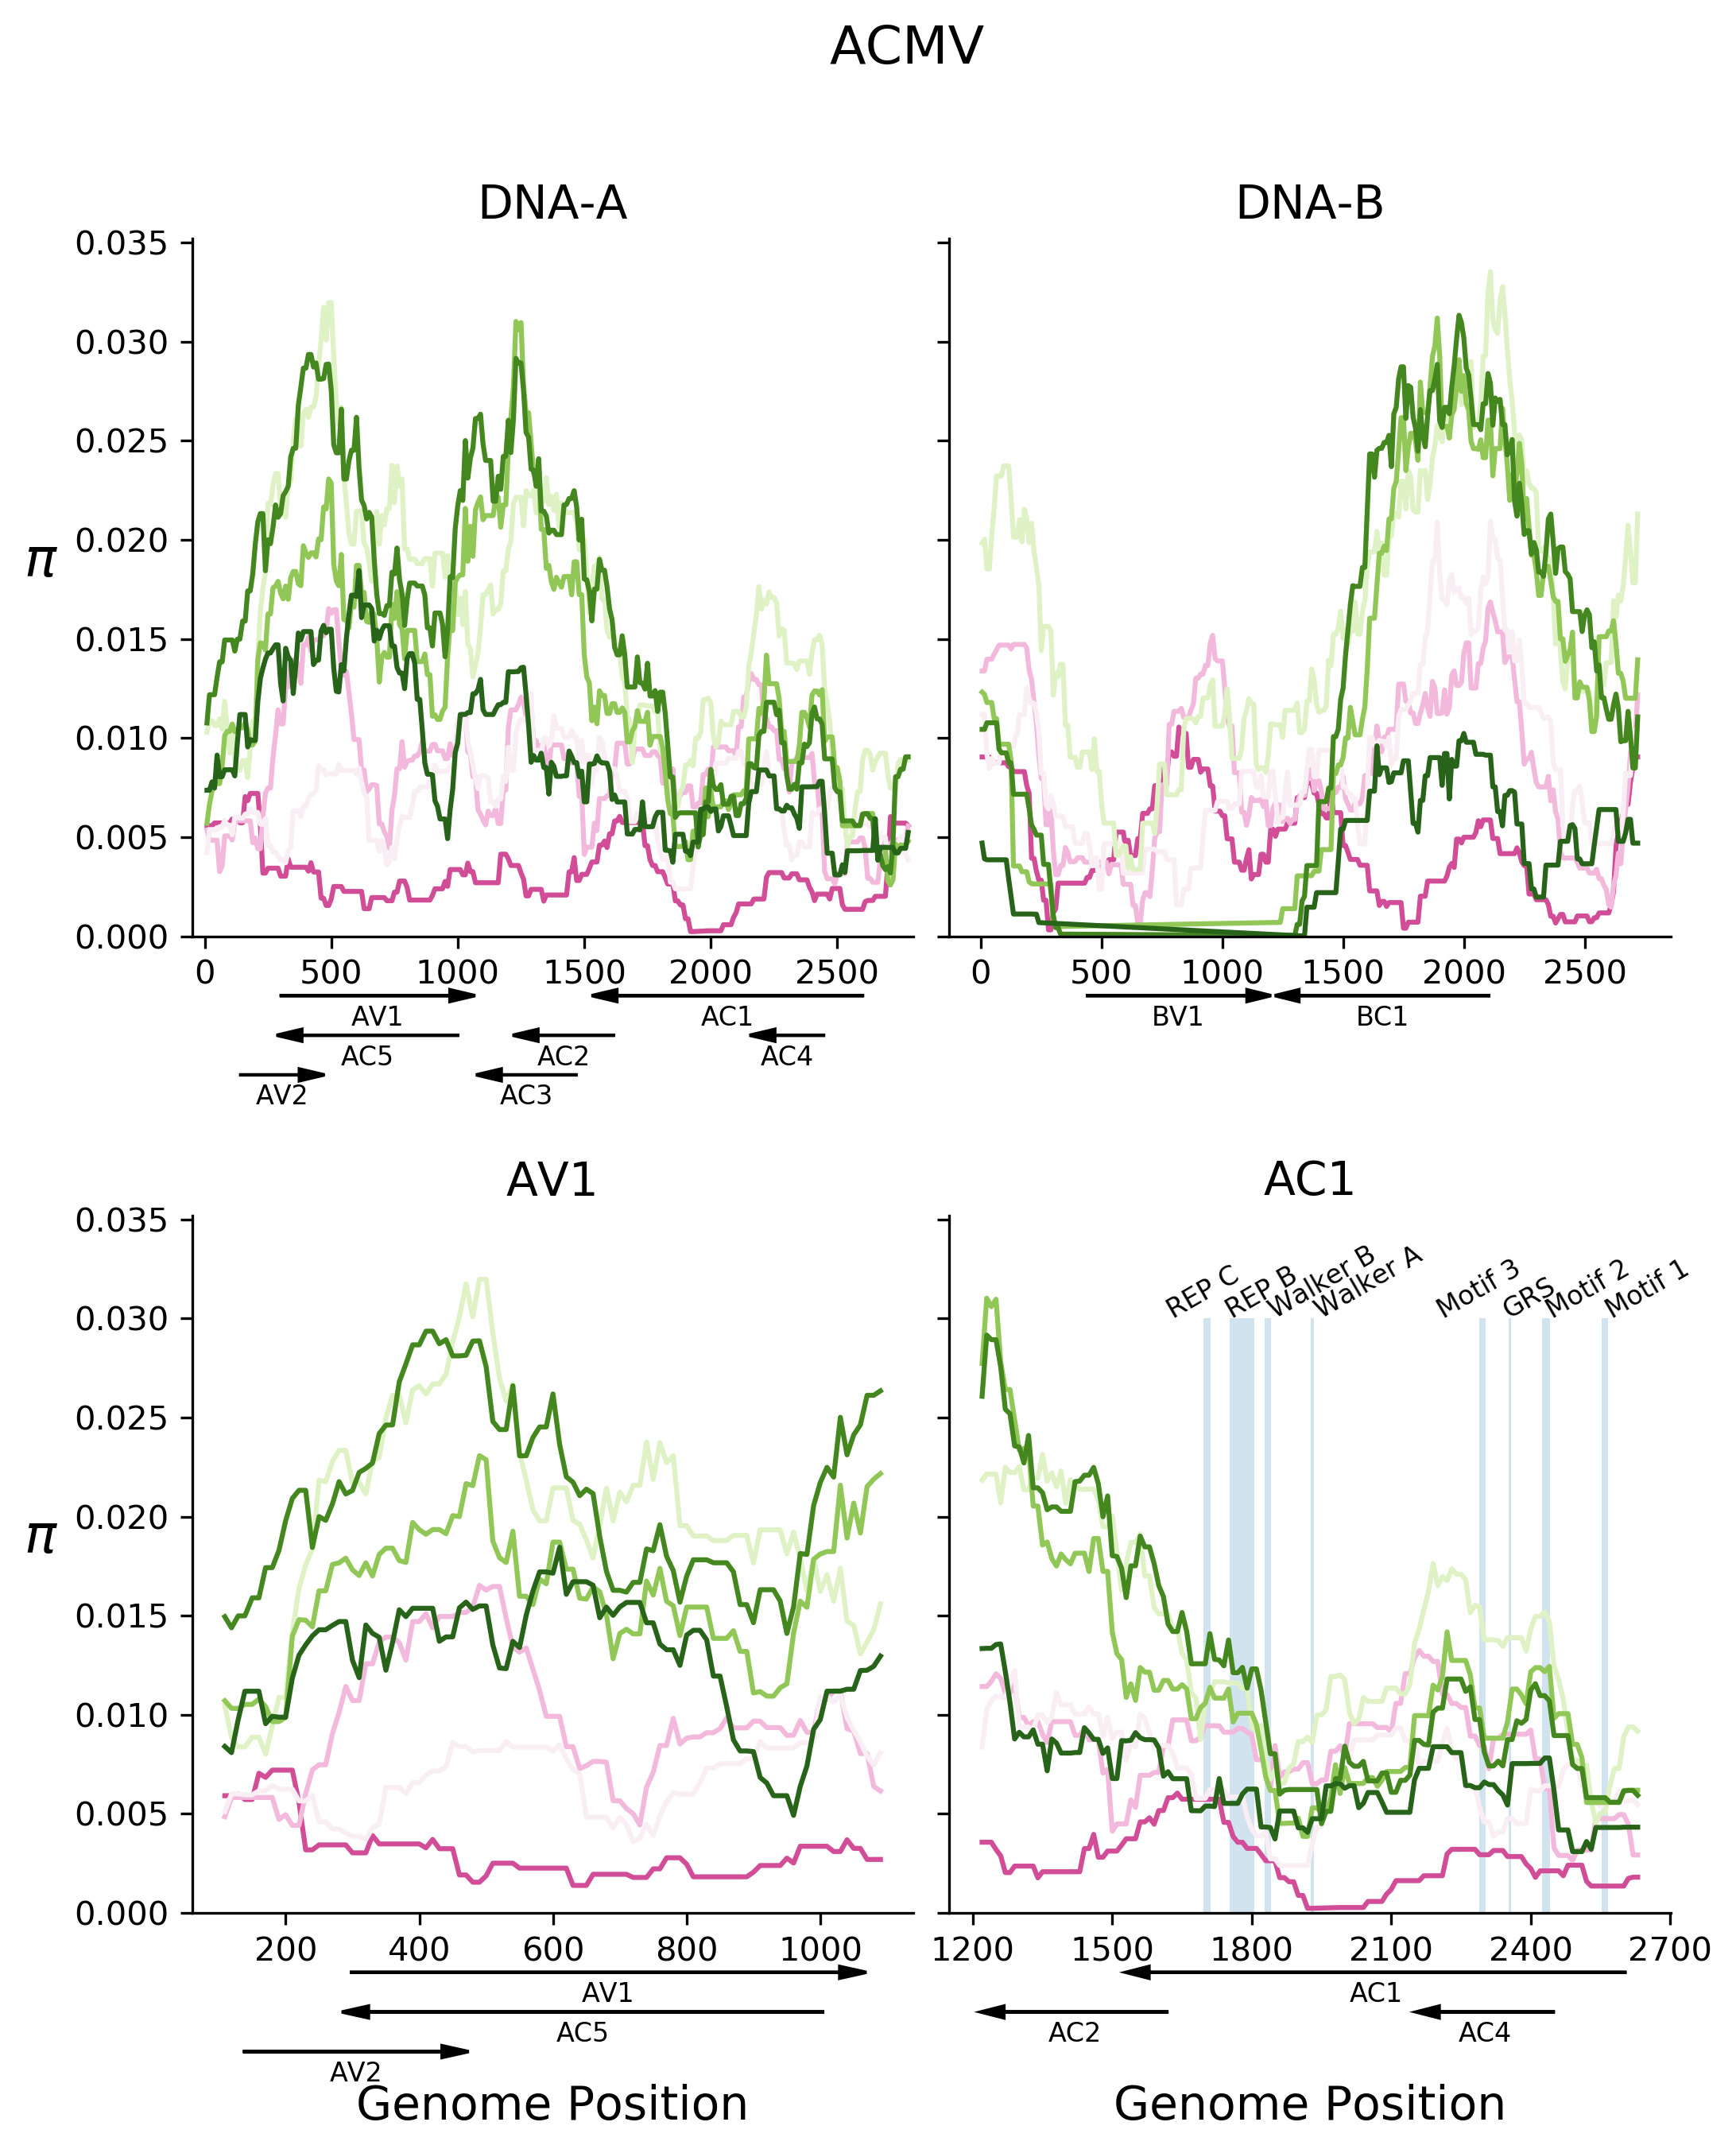

In [39]:
#define the bulk of the graph as functions to cut down clutter later
#create a plot area in <fig> with subplots in <axes>
#2,2 is the number of subplots horizontally,vertically (so 2X2)
#figsize is figure outer dimnsions in inches
#sharey and sharex are set to true to automatically set all subplots to the same scales and prints labels only on the outsides
fig,axes = plt.subplots(2,2,figsize=(8,9),sharey=True,sharex=False,dpi=300)

x = 'window'
y='pi_per_site'

#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in veg_windows.passage.unique(): #[1,4,7]: #
    
    #r = rainbow.pop()
    c = colors(passage * 2)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'ACMV DNA-A'].plot(y=y,x=x,
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'ACMV DNA-B'].plot(y=y,x=x,
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'ACMV DNA-A'].loc[veg_windows.window >= 100].loc[veg_windows.window <= 1090].plot(y=y,x=x,
                                                                        ax=axes[1,0],
                                                                        color=c,
                                                                        legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'ACMV DNA-A'].loc[veg_windows.window >= 1217].loc[veg_windows.window <= 2630].plot(y=y,x=x,
                                                                        ax=axes[1,1],
                                                                        color=c,
                                                                        legend=False)

annot_acmv_ac1(axes[1,1],fs=8)

fix_acmv_genomes_fig(axes,y0=-0.003,y_plus=-0.002,a_plus=-0.0015)


plt.show()
fig.savefig('ACMV_veg6_6.'+fig_format,format=fig_format,dpi=300)

### Veg6 EACMCV
<a id="veg6_eacmcv"></a><br>
<a href="#top">return to top</a>

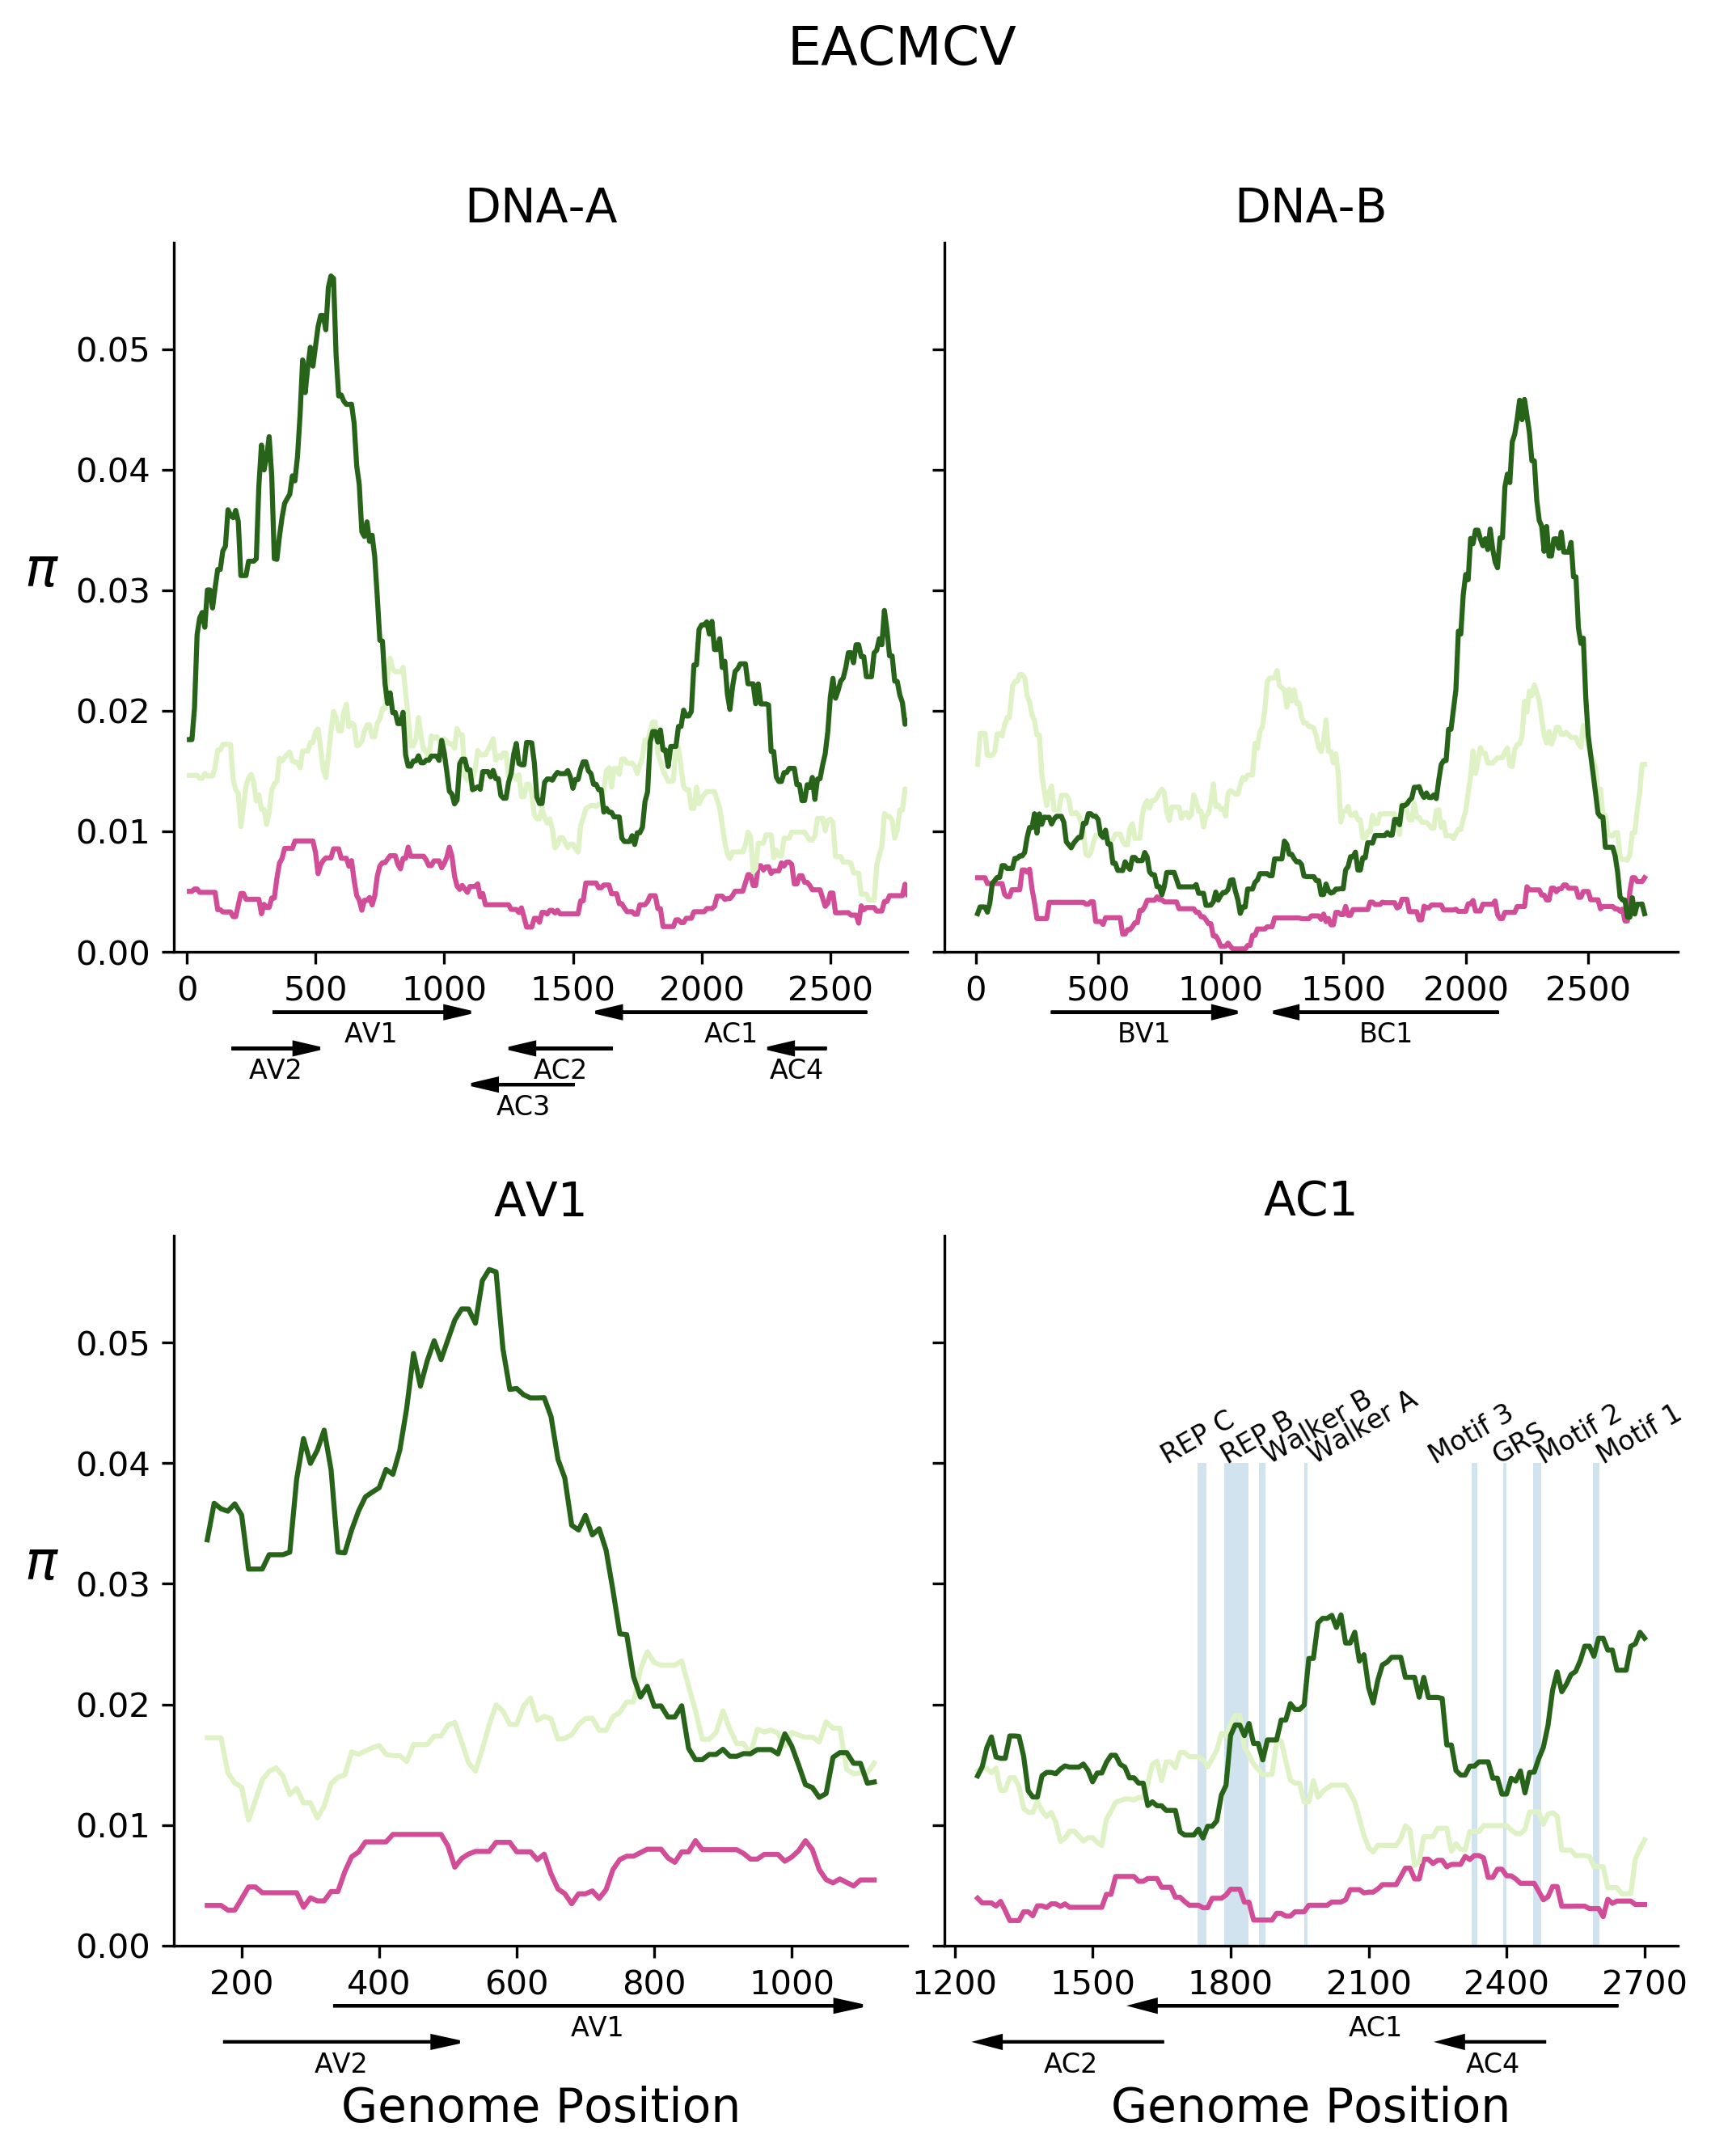

In [43]:
#define the bulk of the graph as functions to cut down clutter later

#create a plot area in <fig> with subplots in <axes>
#2,2 is the number of subplots horizontally,vertically (so 2X2)
#figsize is figure outer dimnsions in inches
#sharey and sharex are set to true to automatically set all subplots to the same scales and prints labels only on the outsides
fig,axes = plt.subplots(2,2,figsize=(8,9),sharey=True,sharex=False,dpi=300)

x = 'window'
y='pi_per_site'

#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in [1,4,7]: # veg_windows.passage.unique(): #
    
    #r = rainbow.pop()
    c = colors(passage*2)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'EACMCV DNA-A'].plot(y=y,x=x,
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'EACMCV DNA-B'].plot(y=y,x=x,
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'EACMCV DNA-A'].loc[veg_windows.window >= 150].loc[veg_windows.window <= 1120].plot(y=y,x=x,
                                                                          ax=axes[1,0],
                                                                          color=c,
                                                                          legend=False)
    veg_windows.loc[veg_windows.passage == passage].loc[veg_windows.chrom == 'EACMCV DNA-A'].loc[veg_windows.window >= 1245].loc[veg_windows.window <= 2700].plot(y=y,x=x,
                                                                          ax=axes[1,1],
                                                                          color=c,
                                                                          legend=False)
#draw motifs
motif_y = 0.040
fs = 9


annot_eacmcv_ac1(axes[1,1],fs=8)    
fix_eacmcv_genomes_fig(axes,y0=-0.005,y_plus=-0.003,a_plus=-0.0025)
plt.show()
fig.savefig('EACMCV_veg6_3.'+fig_format,format=fig_format,dpi=300)

---
## Veg2 figures:
<a id="veg2_main"></a><br>
<a href="#top">return to top</a>

In [13]:
veg2_windows = pd.read_csv('veg2_windows.csv')

### Veg2 ACMV 
<a id="veg2_acmv"></a><br>
<a href="#top">return to top</a>

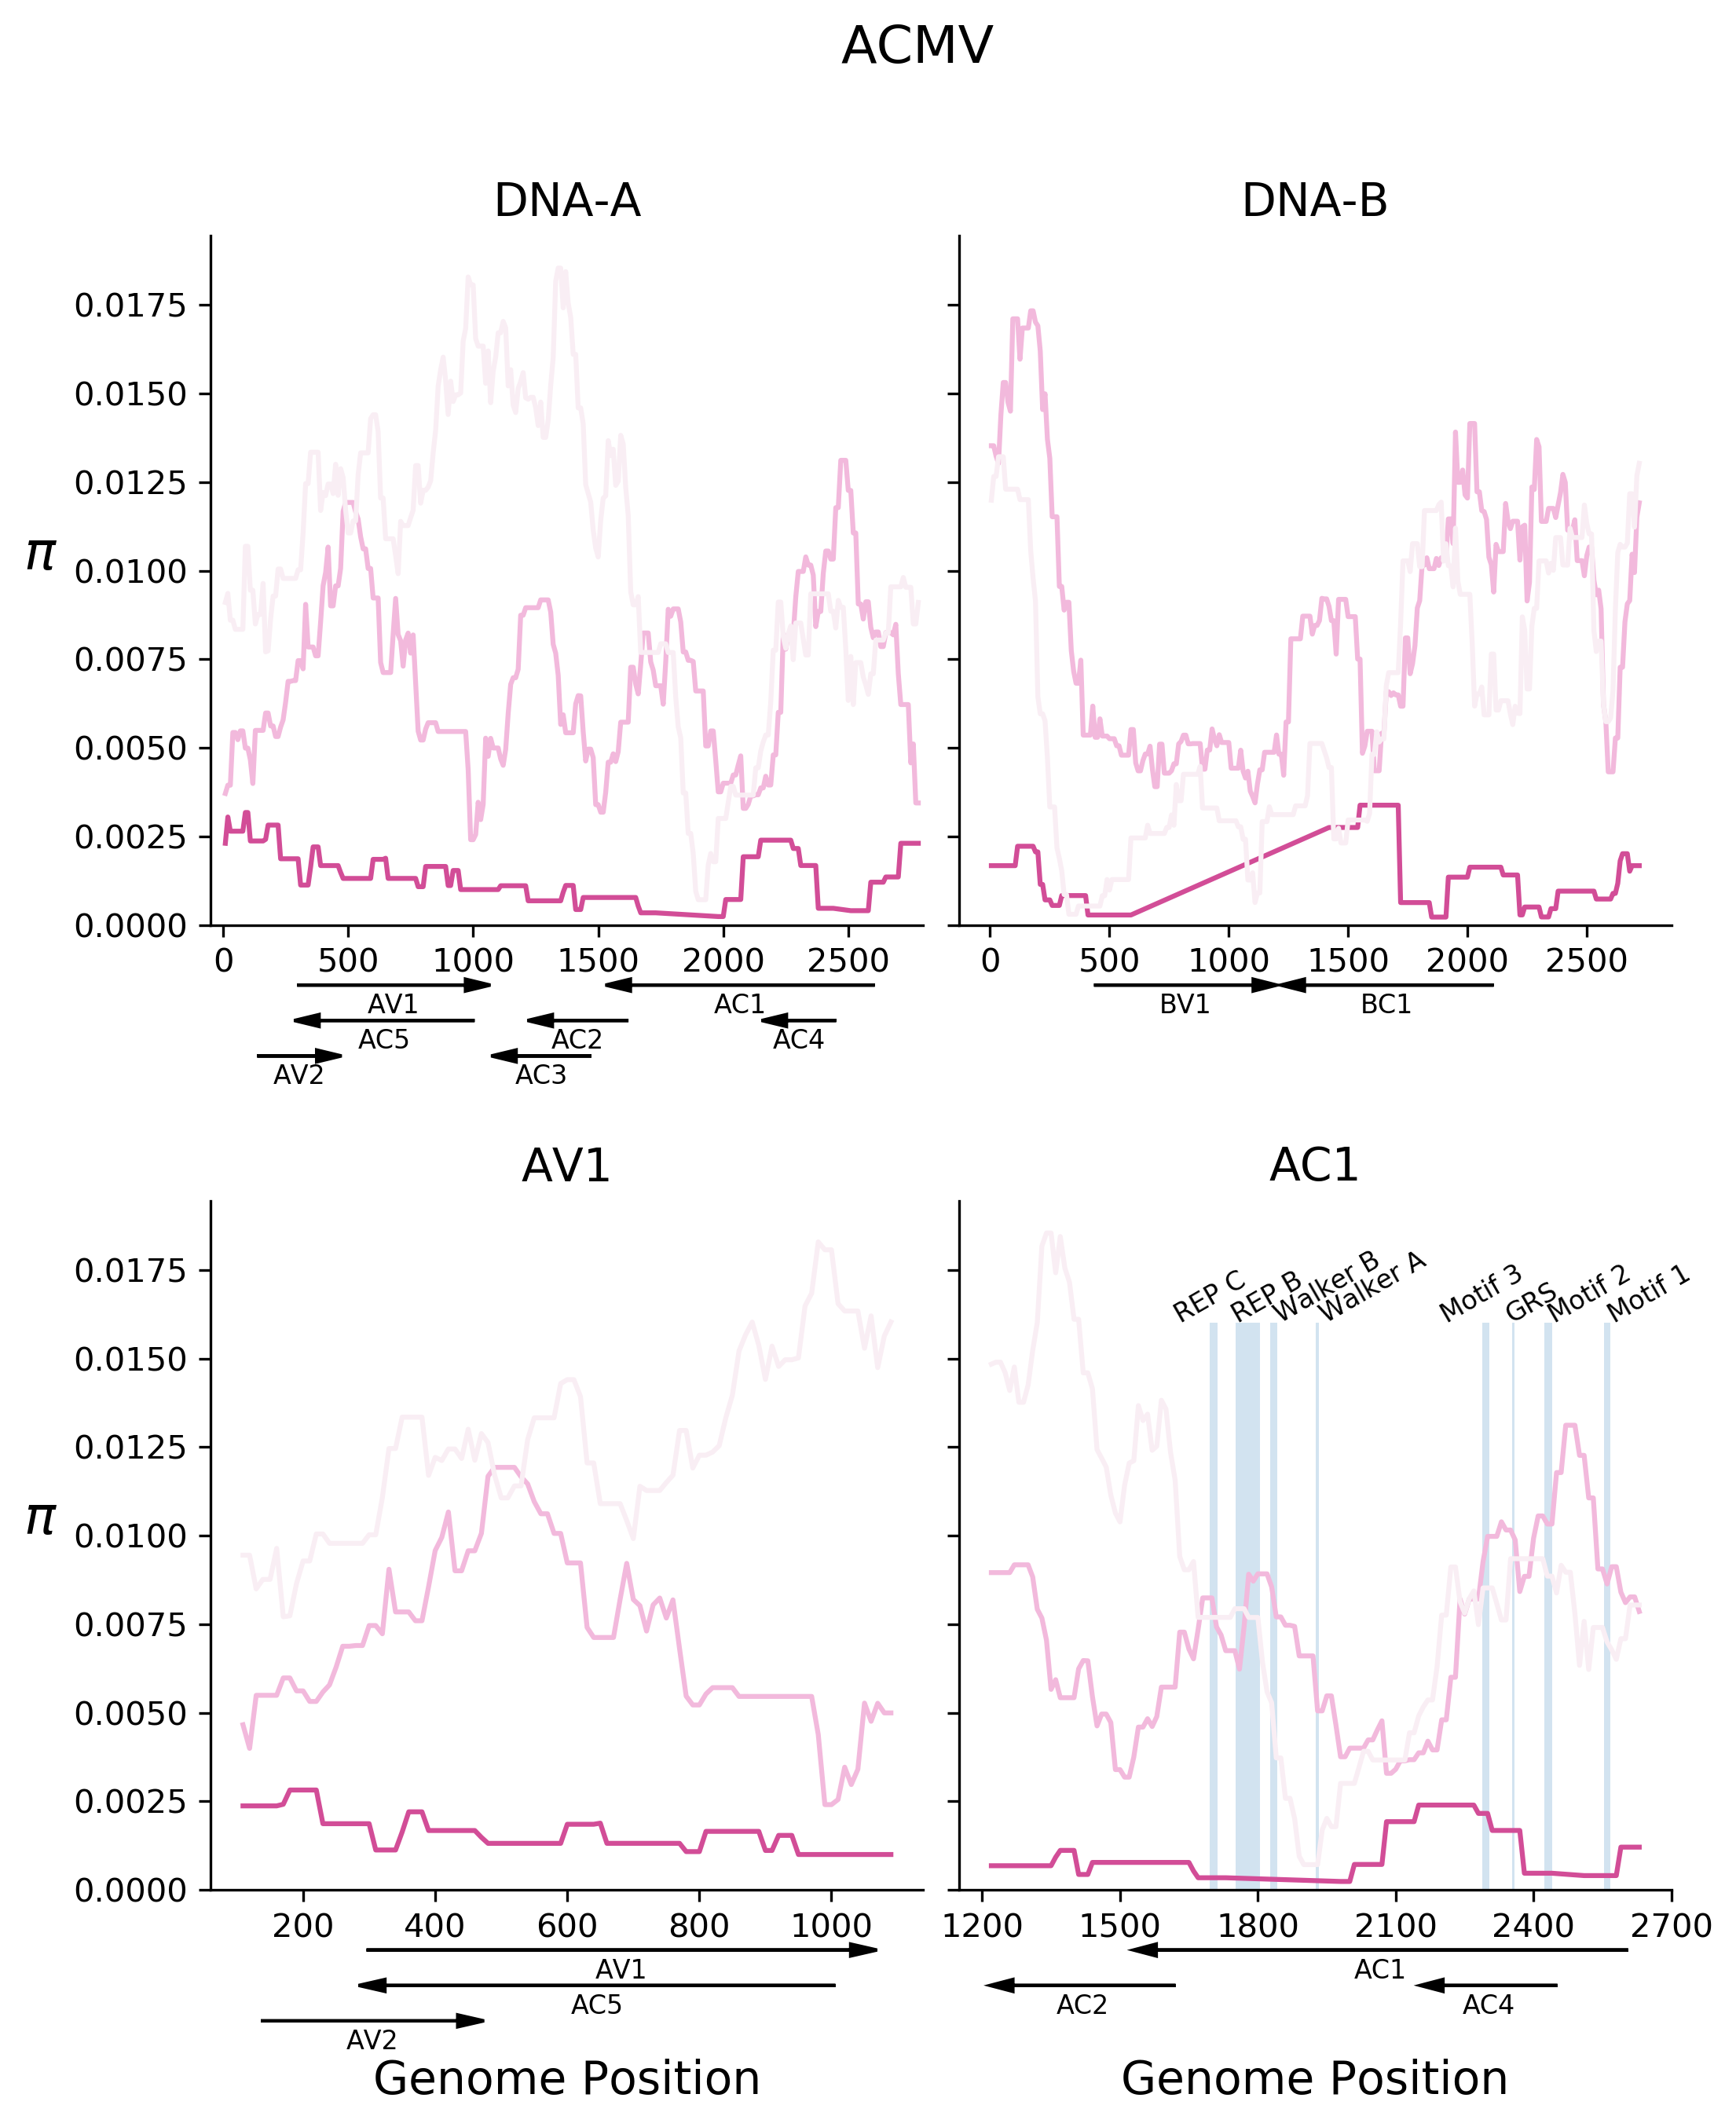

In [34]:
fig,axes = plt.subplots(2,2,figsize=(8,9),sharey=True,sharex=False,dpi=300)

x = 'window'
y='pi_per_site'


#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in veg_windows.passage.unique():
    
    #r = rainbow.pop()
    c = colors(passage*2)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'ACMV DNA-A'].plot(y=y,x=x,
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'ACMV DNA-B'].plot(y=y,x=x,
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'ACMV DNA-A'].loc[veg2_windows.window >= 100].loc[veg2_windows.window <= 1090].plot(y=y,x=x,
                                                                        ax=axes[1,0],
                                                                        color=c,
                                                                        legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'ACMV DNA-A'].loc[veg2_windows.window >= 1217].loc[veg2_windows.window <= 2630].plot(y=y,x=x,
                                                                        ax=axes[1,1],
                                                                        color=c,
                                                                        legend=False)

annot_acmv_ac1(axes[1,1],motif_y=0.0160,fs=8)    
fix_acmv_genomes_fig(axes,y0=-0.0017,y_plus=-0.001,a_plus=-0.0008)
plt.show()
fig.savefig('ACMV_veg2.'+fig_format,format=fig_format,dpi=300)

### Veg2 EACMCV
<a id="veg2_eacmcv"></a><br>
<a href="#top">return to top</a>

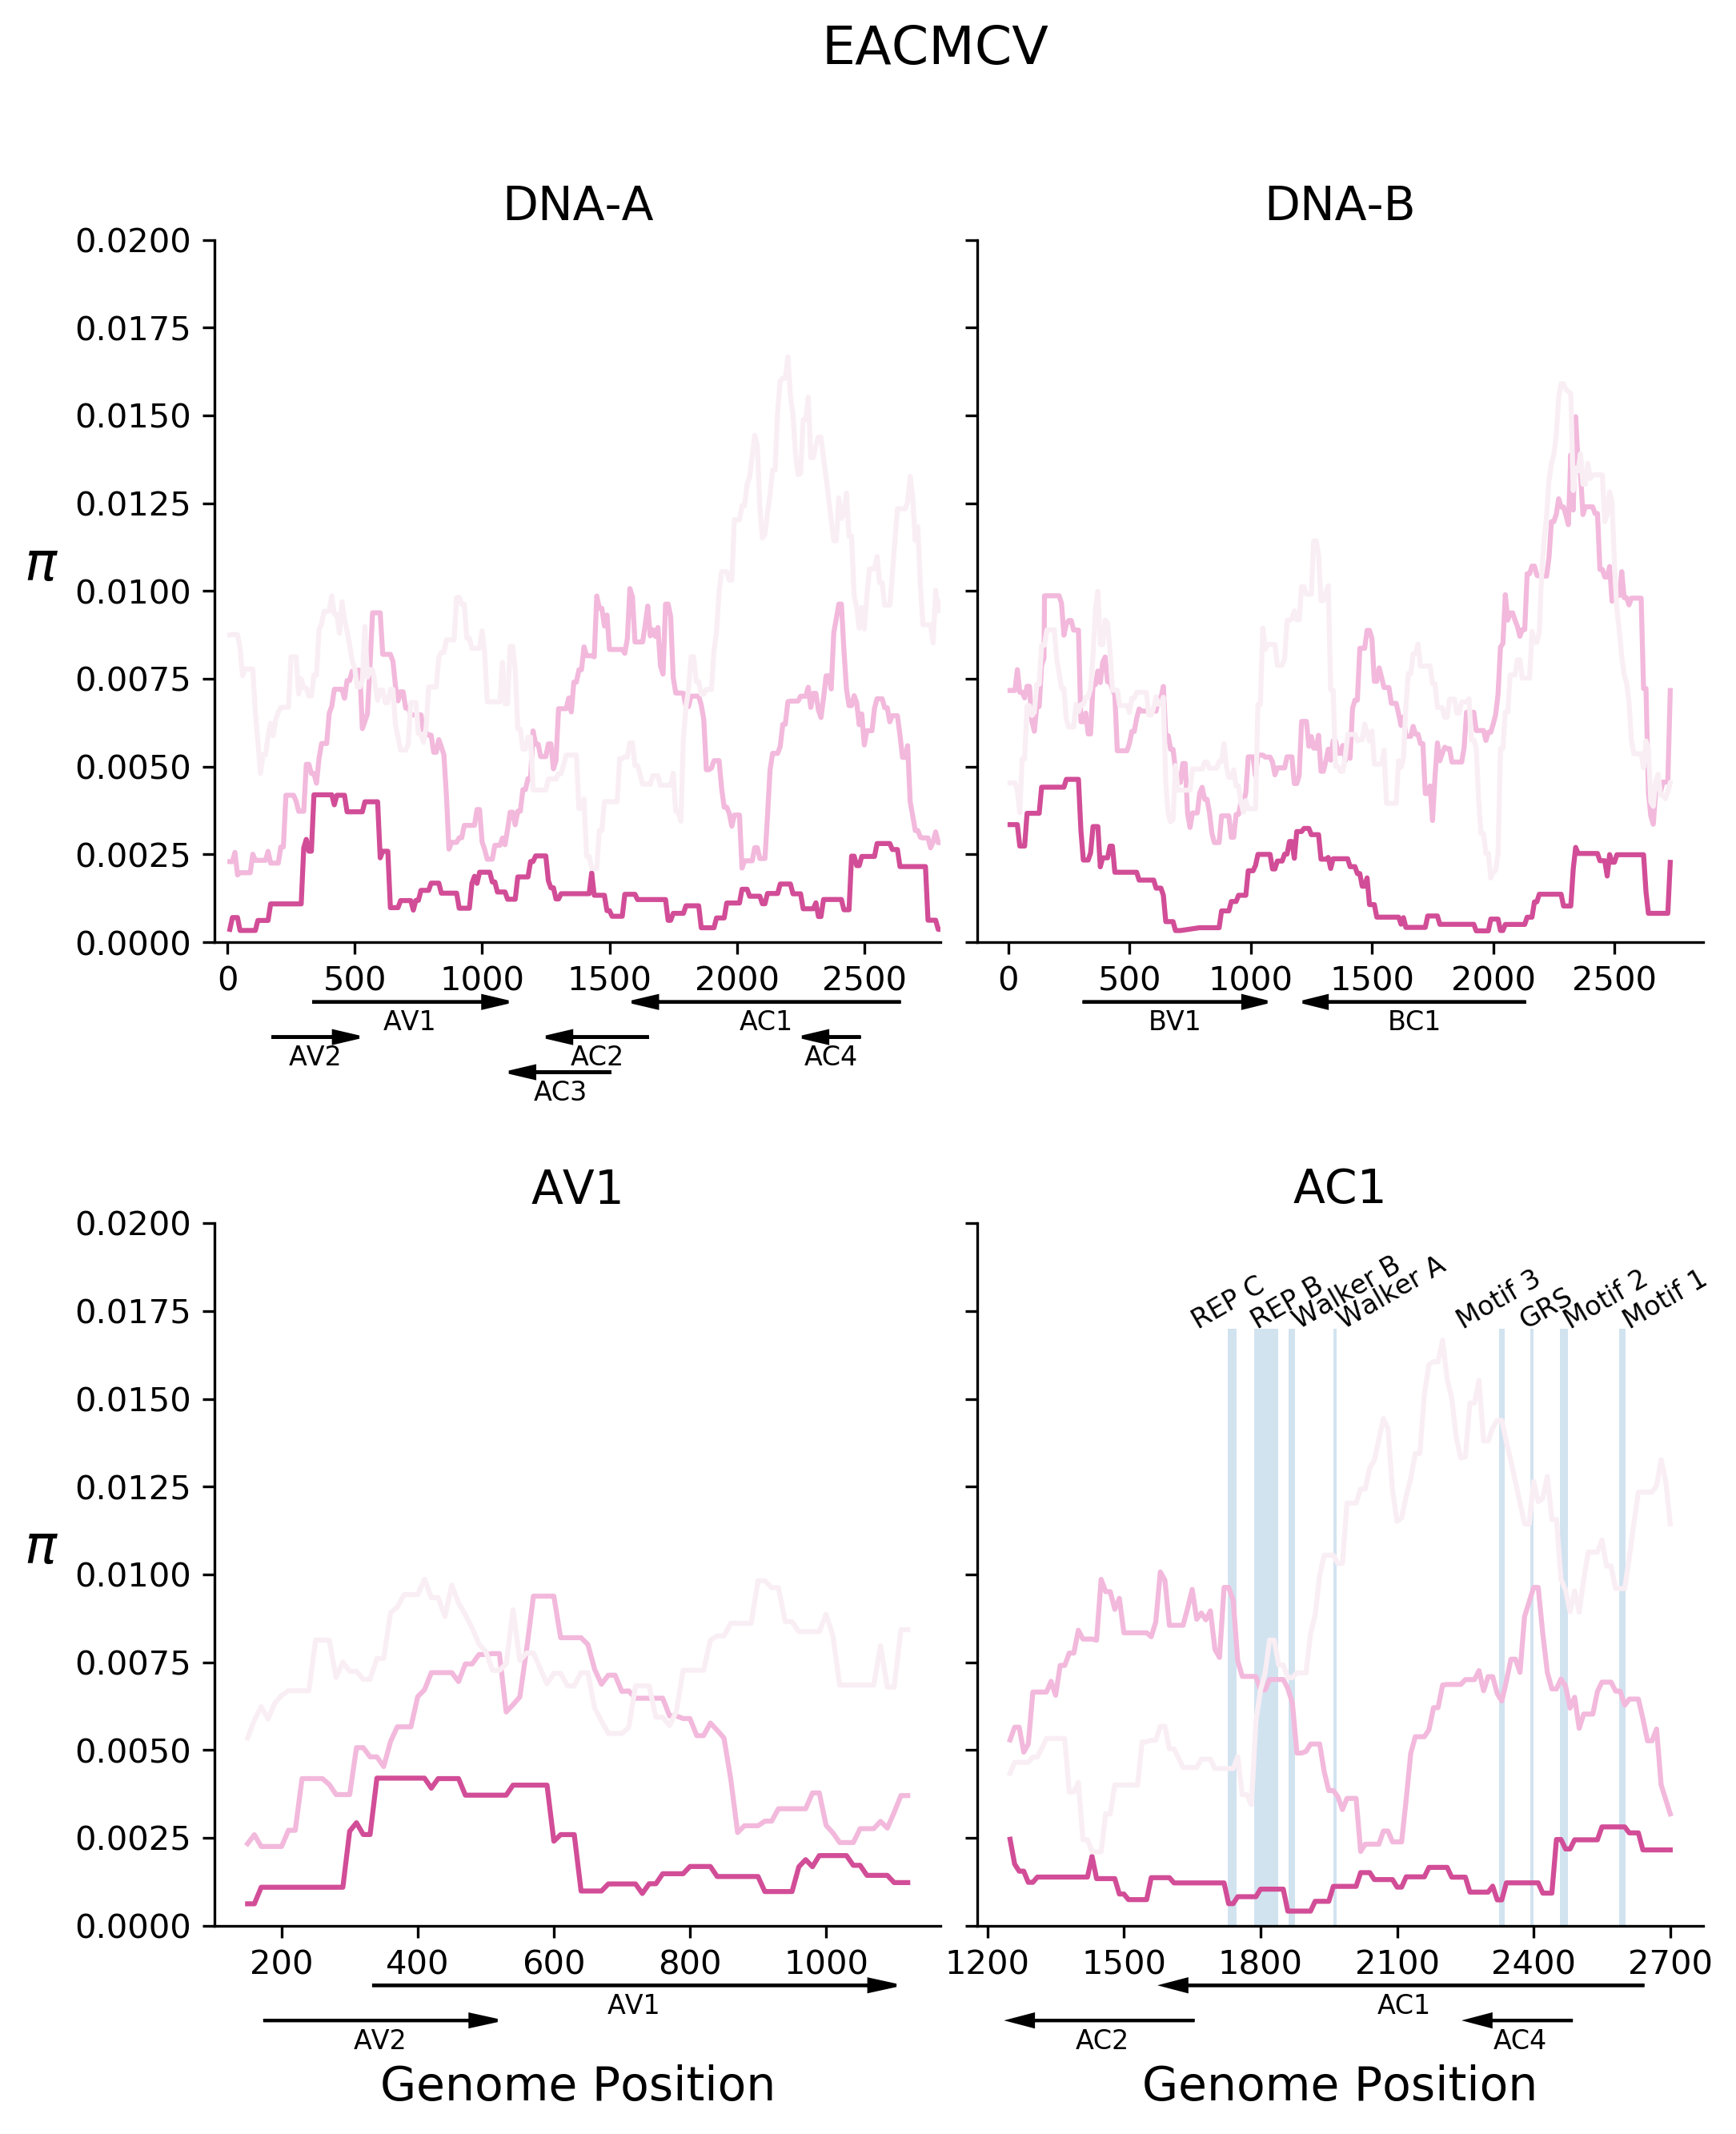

In [44]:
fig,axes = plt.subplots(2,2,figsize=(8,9),sharey=True,sharex=False,dpi=300)

x = 'window'
y='pi_per_site'

#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in veg2_windows.passage.unique(): #veg_windows.passage.unique()
    
    #r = rainbow.pop()
    c = colors(passage * 2)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'EACMCV DNA-A'].plot(y=y,x=x,
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'EACMCV DNA-B'].plot(y=y,x=x,
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'EACMCV DNA-A'].loc[veg2_windows.window >= 150].loc[veg2_windows.window <= 1120].plot(y=y,x=x,
                                                                          ax=axes[1,0],
                                                                          color=c,
                                                                          legend=False)
    veg2_windows.loc[veg2_windows.passage == passage].loc[veg2_windows.chrom == 'EACMCV DNA-A'].loc[veg2_windows.window >= 1245].loc[veg2_windows.window <= 2700].plot(y=y,x=x,
                                                                          ax=axes[1,1],
                                                                          color=c,
                                                                          legend=False)
    
annot_eacmcv_ac1(axes[1,1],motif_y=0.017,fs=8)    
fix_eacmcv_genomes_fig(axes,y0=-0.0017,y_plus=-0.001,a_plus=-0.0008,ymax=0.02)
plt.show()
fig.savefig('EACMCV_veg2.'+fig_format,format=fig_format,dpi=300)

---
## Tajima's D:
<a id="TajimaD"><a/><br>
    <a href="#top">return to top</a>
    

### Veg6 Tajima's D
<a id="td_acmv"></a><br>
<a href="#top">return to top</a>

In [16]:
veg6_tajima_ds = pd.read_csv("veg6_tajima_D_inspection.csv")

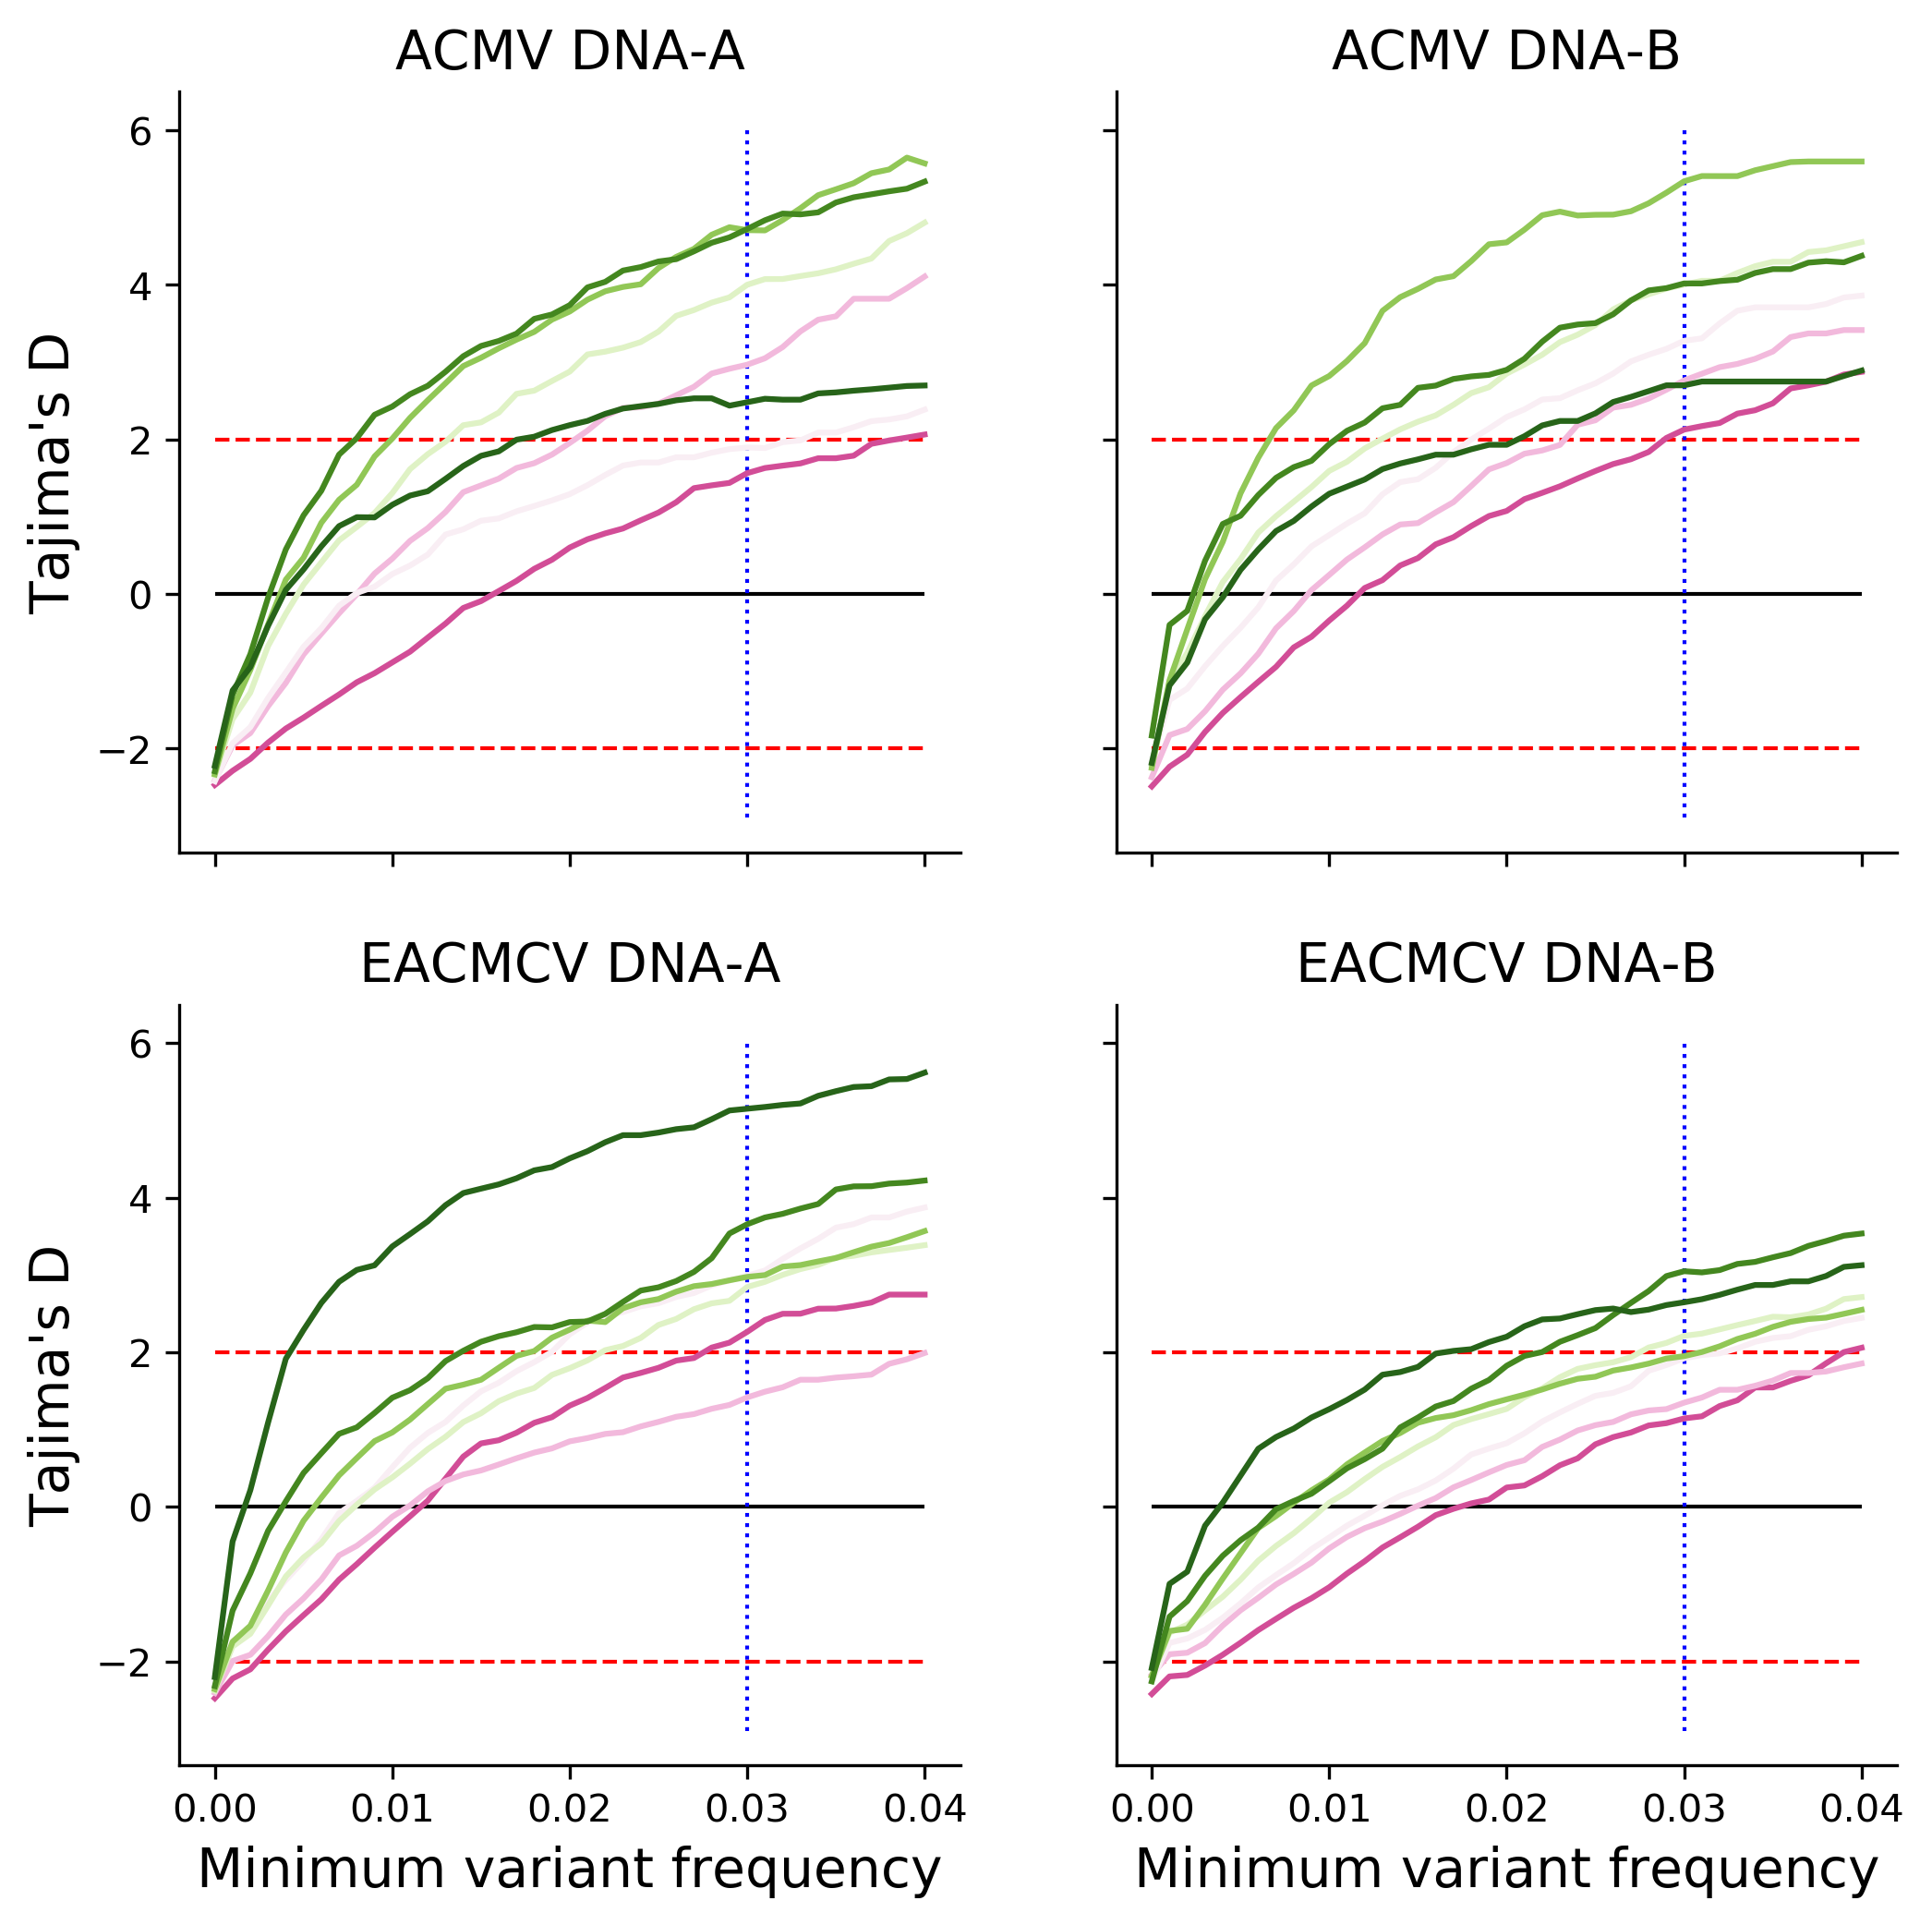

In [17]:
fig,axes = plt.subplots(2,2,figsize=(8,8),sharey=True,sharex=True,dpi=300)

for passage in veg6_tajima_ds.passage.unique():
    c = colors(passage * 2)
    
    veg6_tajima_ds.loc[veg6_tajima_ds.passage == passage].loc[veg6_tajima_ds.chrom == 'ACMV DNA-A'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg6_tajima_ds.loc[veg6_tajima_ds.passage == passage].loc[veg6_tajima_ds.chrom == 'ACMV DNA-B'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg6_tajima_ds.loc[veg6_tajima_ds.passage == passage].loc[veg6_tajima_ds.chrom == 'EACMCV DNA-A'].plot(y='D',x='min_freq',
                                                                        ax=axes[1,0],
                                                                        color=c,
                                                                        legend=False)
    veg6_tajima_ds.loc[veg6_tajima_ds.passage == passage].loc[veg6_tajima_ds.chrom == 'EACMCV DNA-B'].plot(y='D',x='min_freq',
                                                                        ax=axes[1,1],
                                                                        color=c,
                                                                        legend=False)

xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()

axes[0,0].set_title('ACMV DNA-A',fontsize=14)    
axes[0,1].set_title('ACMV DNA-B',fontsize=14)    
axes[1,0].set_title('EACMCV DNA-A',fontsize=14)    
axes[1,1].set_title('EACMCV DNA-B',fontsize=14)
    
axes[0,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[0,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)
    
axes[0,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[0,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    

#generate a thin blue vertical line at x=0.03 for each subplot
axes[0,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[0,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')

axes[1,0].set_xlabel('Minimum variant frequency',fontsize=14)
axes[1,1].set_xlabel('Minimum variant frequency',fontsize=14)
axes[0,0].set_ylabel('Tajima\'s D',fontsize=14)
axes[1,0].set_ylabel('Tajima\'s D',fontsize=14)

axes[0,0].spines['right'].set_visible(False)  
axes[0,1].spines['right'].set_visible(False)    
axes[1,0].spines['right'].set_visible(False)   
axes[1,1].spines['right'].set_visible(False)

axes[0,0].spines['top'].set_visible(False)  
axes[0,1].spines['top'].set_visible(False)    
axes[1,0].spines['top'].set_visible(False)   
axes[1,1].spines['top'].set_visible(False)
 

plt.show()
fig.savefig('Tajima_D_veg6.'+fig_format,format=fig_format,dpi=300)

### Veg2 Tajima's D
<a id="td_eacmcv"></a><br>
<a href="#top">return to top</a>

In [18]:
veg2_tajima_ds = pd.read_csv("veg2_tajima_D_inspection.csv")

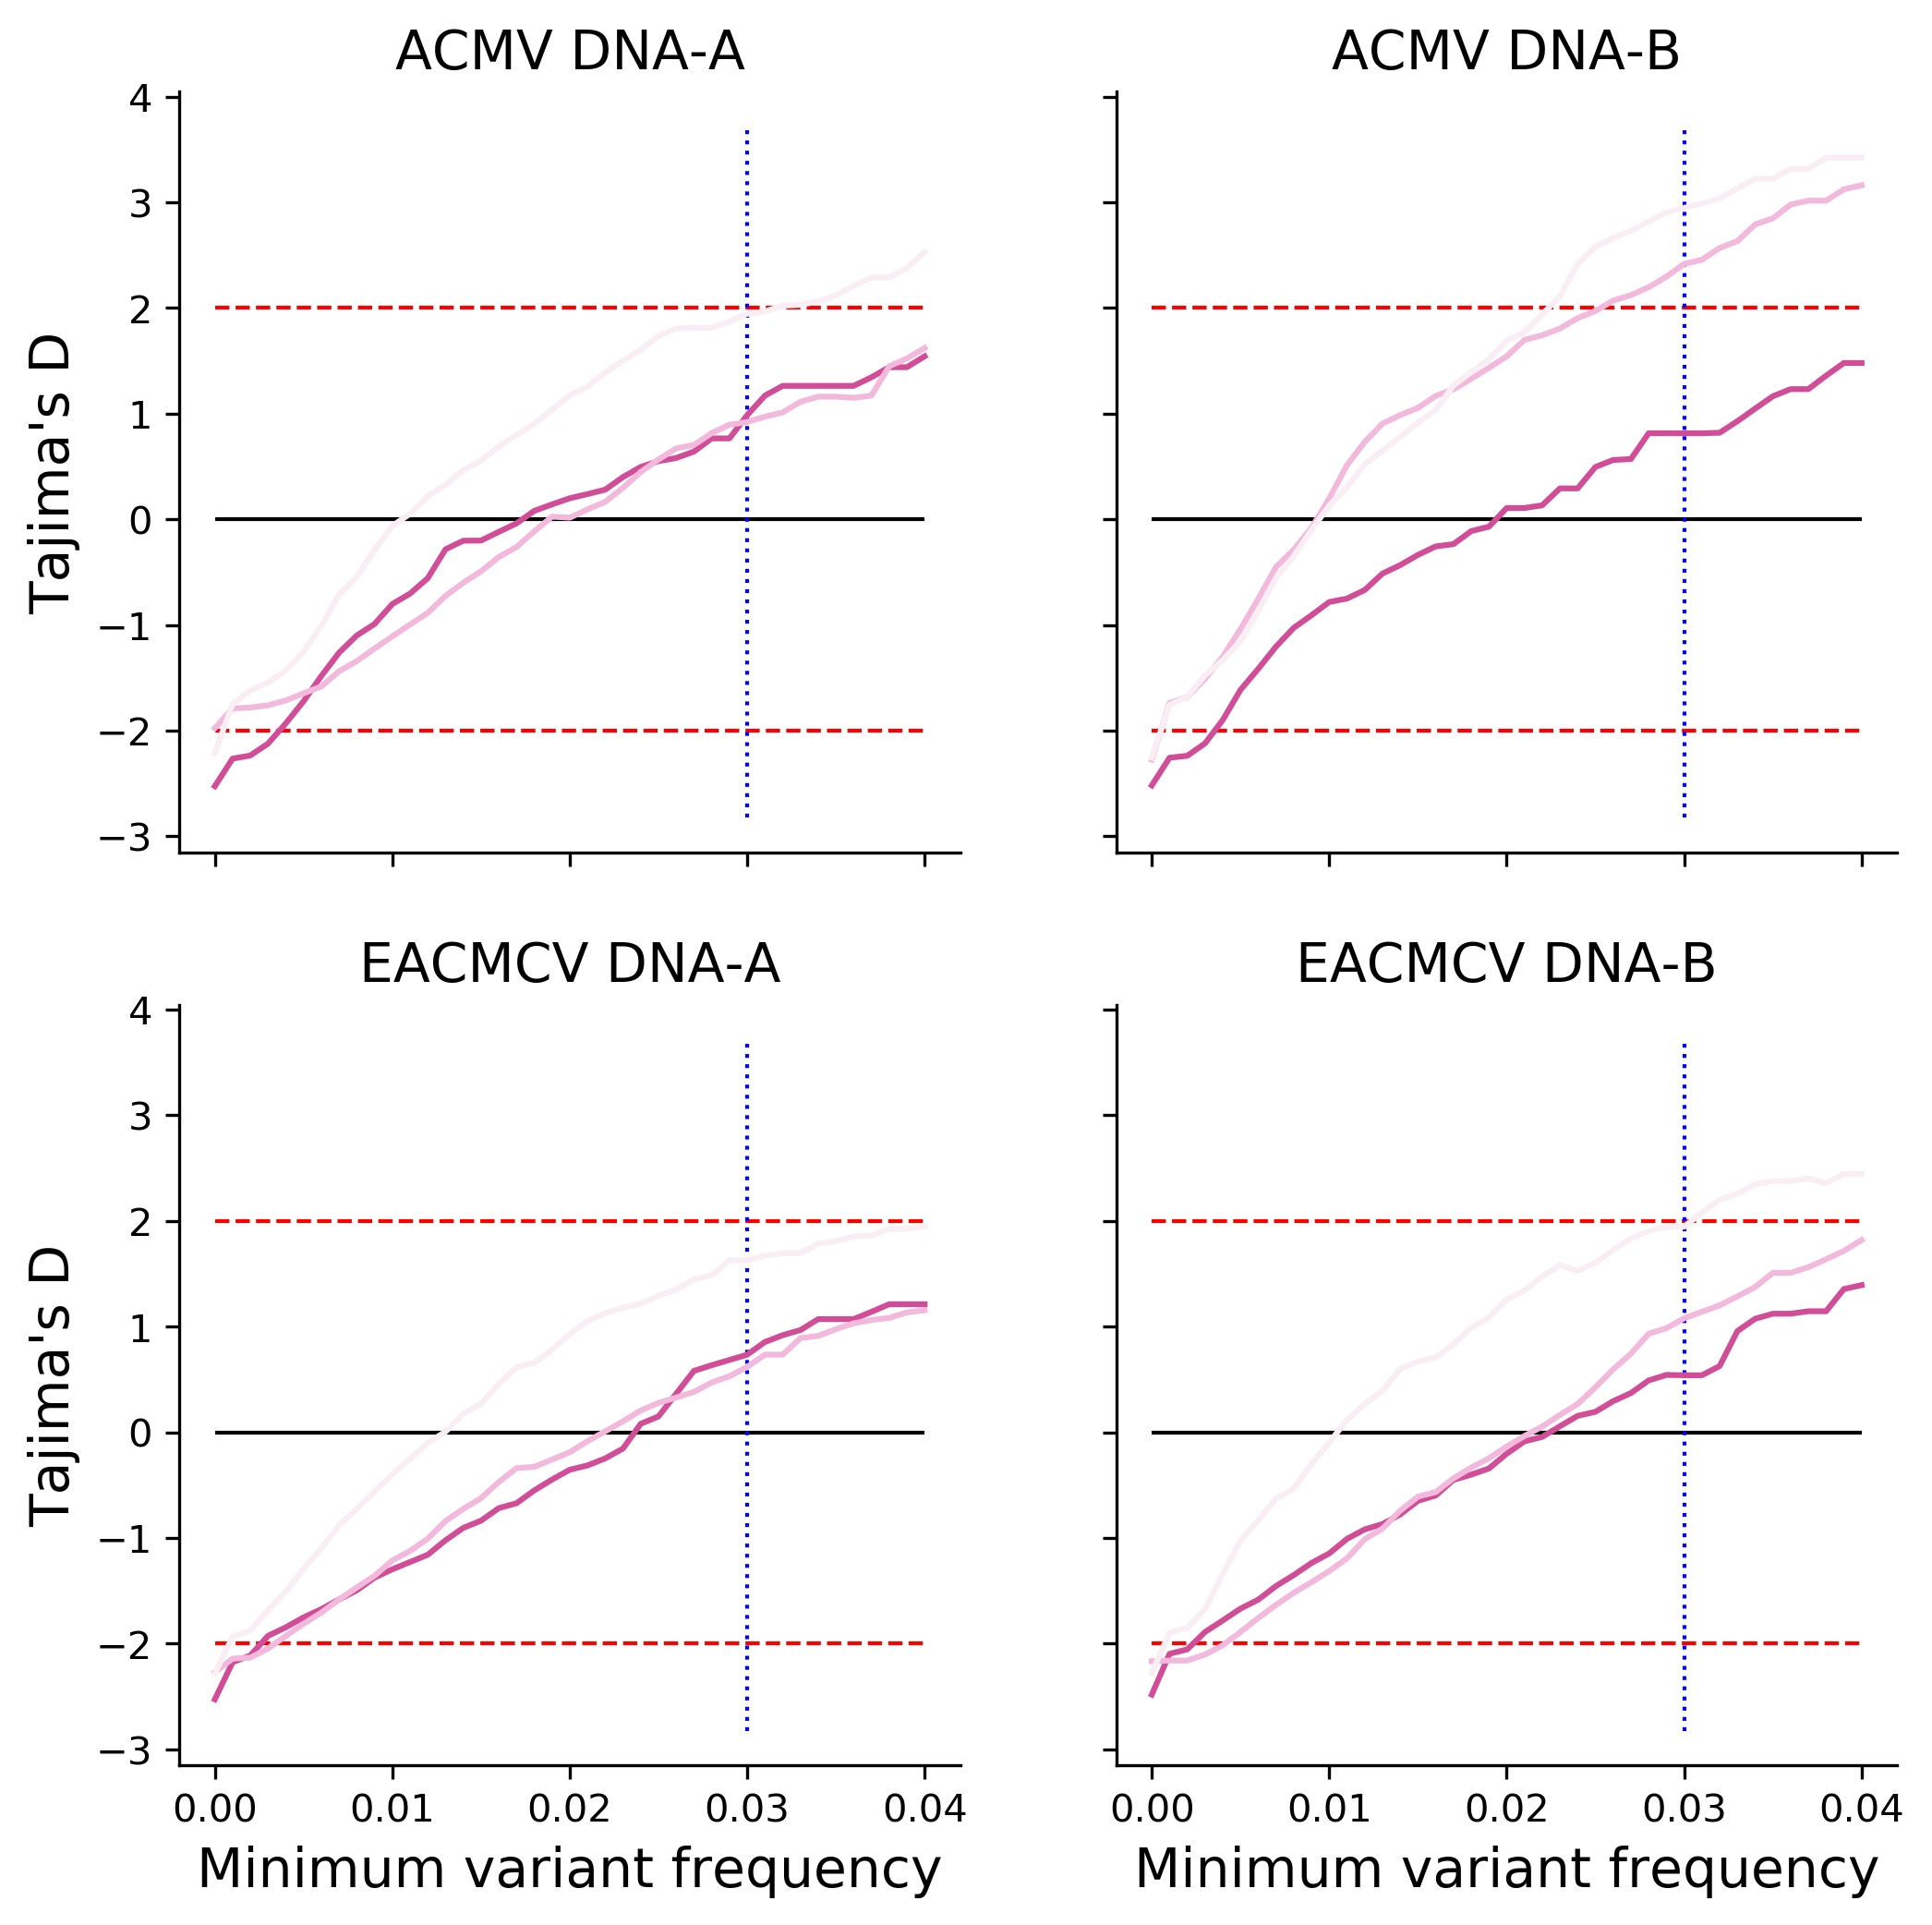

In [19]:
fig,axes = plt.subplots(2,2,figsize=(8,8),sharey=True,sharex=True,dpi=300)

#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in veg2_tajima_ds.passage.unique():
    
    c = colors(passage*2)
    veg2_tajima_ds.loc[veg2_tajima_ds.passage == passage].loc[veg2_tajima_ds.chrom == 'ACMV DNA-A'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    veg2_tajima_ds.loc[veg2_tajima_ds.passage == passage].loc[veg2_tajima_ds.chrom == 'ACMV DNA-B'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    veg2_tajima_ds.loc[veg2_tajima_ds.passage == passage].loc[veg2_tajima_ds.chrom == 'EACMCV DNA-A'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,0],
                                                                          color=c,
                                                                          legend=False)
    veg2_tajima_ds.loc[veg2_tajima_ds.passage == passage].loc[veg2_tajima_ds.chrom == 'EACMCV DNA-B'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,1],
                                                                          color=c,
                                                                          legend=False)

xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()

#set the title for each subplot
axes[0,0].set_title('ACMV DNA-A',fontsize=14)    
axes[0,1].set_title('ACMV DNA-B',fontsize=14)    
axes[1,0].set_title('EACMCV DNA-A',fontsize=14)    
axes[1,1].set_title('EACMCV DNA-B',fontsize=14)
    
#generate a thin black horizontal line a y=0 for each subplot
axes[0,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[0,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)
    
#generate two thin red horizontal lines at y=2 and y=-2 for each subplot
axes[0,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[0,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    

#generate a thin blue vertical line at x=0.03 for each subplot
axes[0,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[0,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    

#set x and y labels at appropriate subplots for the figure
axes[1,0].set_xlabel('Minimum variant frequency',fontsize=14)
axes[1,1].set_xlabel('Minimum variant frequency',fontsize=14)
axes[0,0].set_ylabel('Tajima\'s D',fontsize=14)
axes[1,0].set_ylabel('Tajima\'s D',fontsize=14)

#remove the subplot borders on the right
axes[0,0].spines['right'].set_visible(False)  
axes[0,1].spines['right'].set_visible(False)    
axes[1,0].spines['right'].set_visible(False)   
axes[1,1].spines['right'].set_visible(False)

#remove the subplot borders on the top
axes[0,0].spines['top'].set_visible(False)  
axes[0,1].spines['top'].set_visible(False)    
axes[1,0].spines['top'].set_visible(False)   
axes[1,1].spines['top'].set_visible(False)
 
#show the plot
plt.show() 
fig.savefig('Tajima_D_veg2.'+fig_format,format=fig_format,dpi=300)

## ANOVAS
<a id="anovas_main"></a>
<a href="#top">return to top</a>

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as sf
import plotly.graph_objects as go
from IPython.display import Image

### Veg6 ANOVA
<a id="anova_veg6"></a>

In [21]:
#load data
veg6_data = pd.read_csv("variant-calls_vegprop-expt_2020-04-07_tables.csv",header=0,index_col=0)
veg6_options = get_veg_prop_args()

#filter SNPs
filtered_veg6_data = pd.concat([veg6_data.loc[veg6_data.freqPropReplicateA >= 0.03],
                           veg6_data.loc[veg6_data.freqPropReplicateB >= 0.03]]).drop_duplicates()

filtered_veg6_data['DP'] = filtered_veg6_data['ADReplicateA'] + filtered_veg6_data['ADReplicateB'] + filtered_veg6_data['RDReplicateA'] + filtered_veg6_data['RDReplicateB']
filtered_veg6_data['AD'] = filtered_veg6_data['ADReplicateA'] + filtered_veg6_data['ADReplicateB']

#calculate frequency of aggregated read counts
filtered_veg6_data['freqProp'] = filtered_veg6_data['AD'] / filtered_veg6_data['DP']


#lineage: set to 0 then assign each unique lineage to an unique integer
filtered_veg6_data['lineage_factor'] = 0
j = 0
for lineage in filtered_veg6_data.lineage.unique():
    filtered_veg6_data.loc[filtered_veg6_data.lineage == lineage,['lineage_factor']] = j
    j += 1

#species: Set ACMV = 0 and EACMCV = 1
filtered_veg6_data['species'] = 0
filtered_veg6_data.loc[filtered_veg6_data.chrom == 'EACMCV DNA-A',['species']] = 1
filtered_veg6_data.loc[filtered_veg6_data.chrom == 'EACMCV DNA-B',['species']] = 1

#segment: Set DNA-A = 0 and DNA-B = 1
filtered_veg6_data['segment'] = 0
filtered_veg6_data.loc[filtered_veg6_data.chrom == 'ACMV DNA-B',['segment']] = 1
filtered_veg6_data.loc[filtered_veg6_data.chrom == 'EACMCV DNA-B',['segment']] = 1

#SEGs treatment: Virus Only:0, SEGS-1:1,SEGS-2:2
filtered_veg6_data['SEGs_treatment'] = 0
filtered_veg6_data.loc[filtered_veg6_data.segsTreatment2 == 'SEGS-1','SEGs_treatment'] = 1
filtered_veg6_data.loc[filtered_veg6_data.segsTreatment2 == 'SEGS-2','SEGs_treatment'] = 2

In [22]:
veg6_options['frequency'] = 'freqPropMeanNoNA'

In [23]:
veg6_avg = average_groups(filtered_veg6_data,['species','segment','pos','alt','passage','ref','lineage_factor','SEGs_treatment'])

veg6_avg.reset_index(inplace=True)
veg6_avg['pos'] = veg6_avg.pos.astype(int)
veg6_pi_df = get_group_pis(veg6_avg,
                     options=veg6_options,
                     group_by=['species','segment','passage','lineage_factor','SEGs_treatment'])


C:\Users\Erik\OneDrive\DuffyLab\PIRE\pi_for_temperature_notebook.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_data[frequency] = [x/dp for x in site_data['AD']]


In [24]:
lm = sf.ols('pi ~ passage + C(SEGs_treatment) + (C(species)/C(segment)) + C(lineage_factor)',data=veg6_pi_df).fit(cov_type='HC1')
print("Least squares summary:")
print(lm.summary())

print("\nAnova table:")
veg6_table = sm.stats.anova_lm(lm)
print(veg6_table)

Least squares summary:
                            OLS Regression Results                            
Dep. Variable:                     pi   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     3.077
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           0.000114
Time:                        09:45:21   Log-Likelihood:                -851.96
No. Observations:                 323   AIC:                             1736.
Df Residuals:                     307   BIC:                             1796.
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 15
  'rank is %d' % (J, J_), ValueWarning)


In [25]:
fig = go.Figure(data=[go.Table(
        columnwidth=[60,20,40,40,40,50],
        header=dict(values=['','df','Sum of Squares','Mean Square','F','p'],
                    fill_color='white',
                    align=['left','center','right','right','right','right']),
        cells=dict(values=[veg6_table.index,veg6_table.df,veg6_table.sum_sq.round(6),veg6_table.mean_sq.round(6),veg6_table.F.round(6),veg6_table['PR(>F)'].round(10)],
                  fill_color='white',
                  align=['left','center','right','right','right','right'],
                  height=22),
                )
            ])
fig.show()

In [26]:
fig.write_image("Veg6_anova."+fig_format)

### Veg2 ANOVA
<a id="anova_veg2"></a>

In [27]:
data = pd.read_csv("variant-calls_temperature-expt_2020-04-07_tables.csv", header=0, index_col=0)
veg2_options = get_veg_prop_args()

data_no_32 = data.loc[data.temperature != 32]
data_no_32_both_present = data_no_32.dropna(subset=['ADReplicateA','ADReplicateB'])
filtered_data = pd.concat([data_no_32_both_present.loc[data_no_32_both_present.freqPropReplicateA >= 0.3],
                           data_no_32_both_present.loc[data_no_32_both_present.freqPropReplicateB >= 0.03]]).drop_duplicates()

filtered_data['lineage_factor'] = 0
j = 0
for lineage in filtered_data.lineage.unique():
    filtered_data.loc[filtered_data.lineage == lineage,['lineage_factor']] = j
    j += 1

#species: Set ACMV = 0 and EACMCV = 1
filtered_data['species'] = 0
filtered_data.loc[filtered_data.chrom == 'EACMCV DNA-A',['species']] = 1
filtered_data.loc[filtered_data.chrom == 'EACMCV DNA-B',['species']] = 1

#segment: Set DNA-A = 0 and DNA-B = 1
filtered_data['segment'] = 0
filtered_data.loc[filtered_data.chrom == 'ACMV DNA-B',['segment']] = 1
filtered_data.loc[filtered_data.chrom == 'EACMCV DNA-B',['segment']] = 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (9,58) have mixed types.Specify dtype option on import or set low_memory=False.



In [28]:
veg2_options['frequency'] = 'freqPropMeanNoNA'

In [29]:
veg2_avg = average_groups(filtered_data,['species','segment','pos','alt','passage','ref','lineage_factor','temperature'])

veg2_avg.reset_index(inplace=True)
veg2_avg['pos'] = veg2_avg.pos.astype(int)

veg2_pi_df = get_group_pis(veg2_avg,
                     options=veg2_options,
                     group_by=['species','segment','passage','lineage_factor','temperature'])

In [30]:
lm = sf.ols('pi ~ passage + C(temperature) + (C(species)/C(segment)) + C(lineage_factor)',data=veg2_pi_df).fit(cov_type='HC1')
print("Least squares summary:")
print(lm.summary())

print("\nAnova table:")
veg2_table = sm.stats.anova_lm(lm)
print(veg2_table)

Least squares summary:
                            OLS Regression Results                            
Dep. Variable:                     pi   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     5.416
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.38e-05
Time:                        09:45:30   Log-Likelihood:                -123.36
No. Observations:                  67   AIC:                             266.7
Df Residuals:                      57   BIC:                             288.8
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9



In [31]:
fig = go.Figure(data=[go.Table(
        columnwidth=[60,20,40,40,40,50],
        header=dict(values=['','df','Sum of Squares','Mean Square','F','p'],
                    fill_color='white',
                    align=['center','center','right','right','right','right']),
        cells=dict(values=[veg2_table.index,veg2_table.df,veg2_table.sum_sq.round(6),veg2_table.mean_sq.round(6),veg2_table.F.round(6),veg2_table['PR(>F)'].round(10)],
                  fill_color='white',
                  align=['left','center','right','right','right','right'],
                  height=22))
                     ])
fig.show()

In [32]:
fig.write_image("Veg2_anova."+fig_format)